In [5]:
import os
from pathlib import Path
from pyhdf.SD import SD, SDC
import pprint
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
!ncdump -h '/work/bb1036/b381362/dataset/MYD021KM.A2013122.1140.061.2018046032403.hdf'


In [16]:
os.chdir('/Users/jesse/OneDrive/Documents/thesis')
rttov_output_file = 'output-data_rttov_T12.nc'

sds_rttov_output = SD(rttov_output_file, SDC.READ)

datasets_dict = sds_rttov_output.datasets()

for idx,sds in enumerate(datasets_dict.keys()):
    print(idx,sds)

0 lat
1 lon
2 Y
3 Y_clear
4 brdf
5 iwp_ret
6 iwp_model
7 g
8 f
9 f_clear


In [17]:
TOA_radiance = sds_rttov_output.select('Y') # select sds
print(TOA_radiance.info())
help(TOA_radiance.info)
# first row of the first channel and find its numpy dtype
data_row = TOA_radiance[0,0,:] # get sds data
print(data_row.shape,data_row.dtype)

('Y', 3, [36, 637, 589], 5, 0)
Help on method info in module pyhdf.SD:

info() method of pyhdf.SD.SDS instance
    Retrieves information about the dataset.
    
    Args::
    
      no argument
    
    Returns::
    
      5-element tuple holding:
    
      - dataset name
      - dataset rank (number of dimensions)
      - dataset shape, that is a list giving the length of each
        dataset dimension; if the first dimension is unlimited, then
        the first value of the list gives the current length of the
        unlimited dimension
      - data type (one of the SDC.xxx values)
      - number of attributes defined for the dataset
    
    C library equivalent : SDgetinfo

(589,) float32


In [18]:
TOA_radiance[0,:,:]


array([[          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       ...,
       [5.6389952e-01, 5.6512237e-01, 5.6674296e-01, ..., 1.3421370e+05,
        4.3649094e+19, 4.6535969e-01],
       [5.5687946e-01, 5.7561493e-01, 5.9307456e-01, ..., 4.8475253e+05,
        9.7907104e+07, 4.3100703e-01],
       [5.4995054e-01, 5.4598498e-01, 5.5565590e-01, ..., 1.1013413e+01,
        3.7843453e+15, 4.0504289e-01]], dtype=float32)

(637, 589)
float32
(637, 589)


C:\Users\jesse\anaconda3\envs\modis\lib\site-packages\matplotlib\image.py:482: RuntimeWarning: overflow encountered in subtract
  A_scaled -= a_min
C:\Users\jesse\anaconda3\envs\modis\lib\site-packages\matplotlib\image.py:483: RuntimeWarning: overflow encountered in subtract
  vrange -= a_min
C:\Users\jesse\anaconda3\envs\modis\lib\site-packages\matplotlib\image.py:506: RuntimeWarning: overflow encountered in multiply
  A_resampled *= ((a_max - a_min) / frac)
C:\Users\jesse\anaconda3\envs\modis\lib\site-packages\matplotlib\colors.py:1062: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)


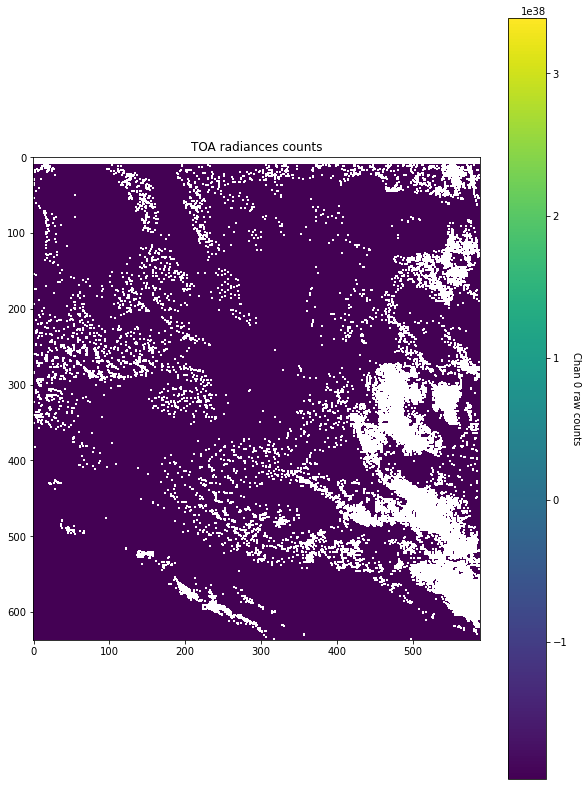

In [19]:
# first row of the first channel and find its numpy dtype
ch_index=1

#Read channel 1 at index 0 into a numpy array of type uint16
ch0_data = TOA_radiance[ch_index,:,:]
print(ch0_data.shape)
print(ch0_data.dtype)
#Plot the channel 30 image
fig,ax = plt.subplots(1,1,figsize = (10,14))
CS=ax.imshow(ch0_data)
cax=fig.colorbar(CS)
ax.set_title('TOA radiances counts')
#
# add a label to the colorbar and flip it around 270 degrees
#
out=cax.ax.set_ylabel('Chan 0 raw counts')
out.set_verticalalignment('bottom')
out.set_rotation(270)
print(ch0_data.shape)